<a href="https://www.kaggle.com/code/shiviyadav/data-preprocessing-shows-survived-non-survived-no?scriptVersionId=104749656" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Load Dataset

In [2]:
titanic = pd.read_csv('/kaggle/input/titanic/train.csv', header = 0, dtype={'Age': np.float64})


# Displaying Data

In [3]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
titanic.shape

(891, 12)

In [7]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Analysis of Dataset

In [10]:
#Name column can never decide survival of a person, hence we can safely delete it
del titanic["Name"]
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
del titanic["Ticket"]
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


In [12]:
del titanic["Fare"]
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,1,0,3,male,22.0,1,0,NaN,S
1,2,1,1,female,38.0,1,0,C85,C
2,3,1,3,female,26.0,0,0,NaN,S
3,4,1,1,female,35.0,1,0,C123,S
4,5,0,3,male,35.0,0,0,NaN,S


In [13]:
del titanic['Cabin']
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


In [14]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 55.8+ KB


Column 'Sex' has data type object .For applying imputation technique,first to convert data type from 'object' to 'category'

In [15]:
titanic["Sex"] = titanic["Sex"].astype('category')

In [16]:
titanic['Sex'].dtypes

CategoricalDtype(categories=['female', 'male'], ordered=False)

Insights: Now,Datatype of Sex is 'category'

Apply LabelEncoder to 'Sex' column in titanic. The value of Sex is change to numerical value 

In [17]:
from sklearn.preprocessing import LabelEncoder

number = LabelEncoder()

titanic['Sex'] = number.fit_transform(titanic['Sex'].astype(str))


Now,use can see Male=1 and Female=0

In [18]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,1,22.0,1,0,S
1,2,1,1,0,38.0,1,0,C
2,3,1,3,0,26.0,0,0,S
3,4,1,1,0,35.0,1,0,S
4,5,0,3,1,35.0,0,0,S


# Checking the Presence of Missing Values in titanic 

In [19]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Embarked         2
dtype: int64

# Fill the null values of the Age column. Fill mean Survived age(mean age of the survived people) in the column where the person has survived and mean not Survived age (mean age of the people who have not survived) in the column where person has not survived

In [20]:

Age= titanic[titanic.Survived==1].Age.mean()
Age

28.343689655172415

In [21]:
titanic["Age"]=np.where(pd.isnull(titanic.Age) & titanic["Survived"]==1  ,Age, titanic["Age"])
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,1,22.0,1,0,S
1,2,1,1,0,38.0,1,0,C
2,3,1,3,0,26.0,0,0,S
3,4,1,1,0,35.0,1,0,S
4,5,0,3,1,35.0,0,0,S


# Fill mean Survived age(mean age of the survived people) in the column where the person has survived

In [22]:
titanic.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            125
SibSp            0
Parch            0
Embarked         2
dtype: int64

# Fill Mean Not Survived Age (mean age of the people who have not survived) in the column where person has not survived

In [23]:
Age=titanic[titanic.Survived==0].Age.mean()
Age

30.62617924528302

In [24]:
titanic.Age.fillna(Age,inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,1,22.0,1,0,S
1,2,1,1,0,38.0,1,0,C
2,3,1,3,0,26.0,0,0,S
3,4,1,1,0,35.0,1,0,S
4,5,0,3,1,35.0,0,0,S


# Now, We find that the Age column has no missing vlaue present.

In [25]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       2
dtype: int64

# We want to check if "Embarked" column is is important for analysis or not, that is whether survival of the person depends on the Embarked column value or not

In [26]:
# Finding the number of people who have survived given that they have embarked or boarded from a particular port
survivedQ = titanic[titanic.Embarked == 'Q'][titanic.Survived == 1].shape[0]
survivedC = titanic[titanic.Embarked == 'C'][titanic.Survived == 1].shape[0]
survivedS = titanic[titanic.Embarked == 'S'][titanic.Survived == 1].shape[0]
print(survivedQ)
print(survivedC)
print(survivedS)

30
93
217


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [27]:
# Finding the number of people who have not survived given that they have embarked or boarded from a particular port
survivedQ = titanic[titanic.Embarked == 'Q'][titanic.Survived == 0].shape[0]
survivedC = titanic[titanic.Embarked == 'C'][titanic.Survived == 0].shape[0]
survivedS = titanic[titanic.Embarked == 'S'][titanic.Survived == 0].shape[0]
print(survivedQ)
print(survivedC)
print(survivedS)

47
75
427


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [28]:
titanic.dropna(inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,1,22.0,1,0,S
1,2,1,1,0,38.0,1,0,C
2,3,1,3,0,26.0,0,0,S
3,4,1,1,0,35.0,1,0,S
4,5,0,3,1,35.0,0,0,S


In [29]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

Check the data type of column 'Embarked'

In [30]:
titanic['Embarked'].dtypes

dtype('O')

Change 'object' data type to 'category' for performing imputation technique

In [31]:
titanic['Embarked']=titanic['Embarked'].astype('category')

In [32]:
titanic.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  889 non-null    int64   
 1   Survived     889 non-null    int64   
 2   Pclass       889 non-null    int64   
 3   Sex          889 non-null    int64   
 4   Age          889 non-null    float64 
 5   SibSp        889 non-null    int64   
 6   Parch        889 non-null    int64   
 7   Embarked     889 non-null    category
dtypes: category(1), float64(1), int64(6)
memory usage: 56.6 KB


Import LAbelEncoder module to impute categorical data in 'Embarked' column

In [33]:
from sklearn.preprocessing import LabelEncoder

for Embarked in ["Embarked"]:
    titanic[Embarked] = LabelEncoder().fit_transform(titanic[Embarked])

In [34]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,1,22.0,1,0,2
1,2,1,1,0,38.0,1,0,0
2,3,1,3,0,26.0,0,0,2
3,4,1,1,0,35.0,1,0,2
4,5,0,3,1,35.0,0,0,2


In [35]:
titanic.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
886,887,0,2,1,27.000000,0,0,2
887,888,1,1,0,19.000000,0,0,2
888,889,0,3,0,30.626179,1,2,2
889,890,1,1,1,26.000000,0,0,0
890,891,0,3,1,32.000000,0,0,1


In [36]:
#Drawing a pie chart for number of males and females aboard
import matplotlib.pyplot as plt
from matplotlib import style

In [37]:
Male_P = (titanic['Sex'] ==1 ).sum() 

In [38]:
Male_P

577

In [39]:
#Summing up all the values of column 'sex' with a condition for male and similar for females
Female_P = (titanic['Sex'] == 0).sum()

In [40]:
Female_P

312

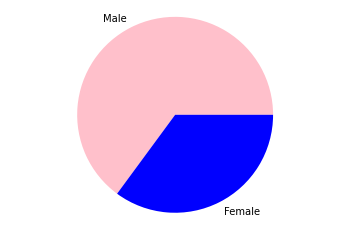

In [41]:
p = [Male_P, Female_P]
plt.pie(p,labels = ['Male', 'Female'], colors = ['pink', 'blue'],explode=None,startangle=0)  
plt.axis('equal') 
plt.show()

In [42]:
# More Precise Pie Chart
Male_S=titanic[titanic.Sex==1][titanic.Survived==1].shape[0]
print(Male_S)
Male_N=titanic[titanic.Sex==1][titanic.Survived==0].shape[0]
print(Male_N)
Female_S=titanic[titanic.Sex==0][titanic.Survived==1].shape[0]
print(Female_S)
Female_N=titanic[titanic.Sex==0][titanic.Survived==0].shape[0]
print(Female_N)

109
468
231
81


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


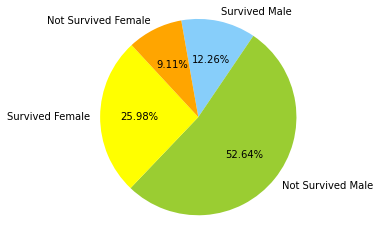

In [43]:
chart=[Male_S,Male_N,Female_S,Female_N]
colors=['lightskyblue','yellowgreen','Yellow','Orange']
labels=["Survived Male","Not Survived Male","Survived Female","Not Survived Female"]
explode=None
plt.pie(chart,labels=labels,colors=colors,explode=explode,startangle=100,counterclock=False,autopct="%.2f%%")
plt.axis("equal")
plt.show()